<a href="https://colab.research.google.com/github/HwayoungYoon/coin-analysis/blob/main/%EA%B0%9C%EB%B3%84%EC%9D%98_%EA%B0%80%EA%B2%A9_%EA%B7%B8%EB%9E%98%ED%94%84%EB%A1%9C_%EC%A0%84%EB%A7%9D_%EC%98%88%EC%B8%A1_%EC%BD%94%EC%9D%B8%EB%A7%88%EC%BC%93%EC%BA%A1_%EC%B6%9C%EB%A0%A5ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💰개별의 가격 그래프로 전망 예측하기📈

임의의 예시로 예측을 진행함

'파일 - 드라이브에 사본 저장' 후 저장된 사본에서 코드 수정해서 사용해주세유♥️

✨ **Tip!**
* 위에서부터 순서대로 실행
* 코드가 입력된 회색 박스 왼쪽 상단 ▶️ 버튼을 누르거나 박스 클릭 후 **Ctrl+Enter**를 누르면 실행됨
* 수정해서 사용해야할 부분들은 중간중간 있는 텍스트 중 '✅ **수정** ✅'이라고 써있는 부분을 참고
* 수정해야 할 코드는  중간중간 있는 텍스트 중 '✅ **수정** ✅'이라고 써있는 부분 중 아래와 같은 부분을 참고
```
요렇게 코드 박스랑 비슷하지만 들여쓰기가 되어있는 부분
```

* 결과에 대한 분석은 중간중간 있는 텍스트 중 '📌 **분석** 📌'이라고 써있는 부분을 참고

## 1. 코드 실행에 필요한 라이브러리 설치
* 맨처음 한 번만 실행
* 만약 아래 코드에 오류가 난다면 라이브러리 설치를 한 번 더 실행한 뒤 다시 아래 코드 실행

```
!pip install cryptocmd
```
* pip install이 앞에 붙어있는 코드는 'from 어쩌구 import 저쩌구' 쭉 써있는 코드 실행했을 때 오류 나는 경우에만 딱 한 번 실행하면 됨

참고 : https://github.com/guptarohit/cryptoCMD

In [ ]:
# 바로 아래 코드가 오류난 경우에만 실행하기
!pip install cryptocmd

     |████████████████████████████████| 48 kB 4.6 MB/s 


In [ ]:
# 바로 위 코드 무시하고 이 코드부터 실행하기
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

import time
from datetime import datetime
from tqdm import tqdm
from cryptocmd import CmcScraper

from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

%matplotlib inline
warnings.filterwarnings('ignore')

## 2. 데이터 가져오기
✅ **수정** ✅
* 코드블록 맨 마지막에 있는 start_date, end_date, symbol의 값(빨간 글씨)만 수정하면 됨
* 예시 : 2017년 02월 01일부터 2022년 02월 11일까지 CREAM/USD의 데이터 가져오기
* **01-02-2017, 11-02-2022, CREAM**를 원하는 값으로 수정
```
start_date = '2017-02-01'
end_date = '2022-02-01'
symbol = 'CREAM'
```

In [ ]:
from cryptocmd import CmcScraper

start_date = '01-02-2017'
end_date = '11-02-2022'
symbol = 'BTL'

scraper = CmcScraper(symbol, start_date, end_date)
headers, data = scraper.get_data()
json_data = scraper.get_data("json")
scraper.export("csv")
df = scraper.get_dataframe()

**데이터가 잘 가져와졌는지 확인**
* 가져온 데이터의 처음과 끝 위주로 보여줌
* 바이낸스에 2017년 08월 17일 이전 데이터는 없는 것 같음

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-02-11,0.082860,0.097272,0.075240,0.084981,717143.56,0
1,2022-02-10,0.092171,0.102670,0.082859,0.082859,483335.24,0
2,2022-02-09,0.080653,0.095949,0.080577,0.092173,475258.02,0
3,2022-02-08,0.082645,0.084398,0.079308,0.080656,530306.60,0
4,2022-02-07,0.085793,0.087837,0.082409,0.082643,482547.52,0
5,2022-02-06,0.084550,0.086285,0.083972,0.085792,513166.34,0
6,2022-02-05,0.086849,0.089479,0.080749,0.084554,541339.65,0
7,2022-02-04,0.076783,0.090455,0.072362,0.086848,577262.48,0
8,2022-02-03,0.070058,0.079326,0.069744,0.076788,600723.68,0
9,2022-02-02,0.071125,0.100415,0.063385,0.070057,562271.21,0


## 3. 데이터 전처리
분석을 위해 Open, High, Low, Close 평균을 낸 Mean 열 생성

In [ ]:
df["Mean"] = (df['Open'] + df['High'] + df['Low'] + df['Close'])/4
df

,Date,Open,High,Low,Close,Volume,Market Cap,Mean
0,2022-02-11,0.082860,0.097272,0.075240,0.084981,717143.56,0,0.085088
1,2022-02-10,0.092171,0.102670,0.082859,0.082859,483335.24,0,0.090140
2,2022-02-09,0.080653,0.095949,0.080577,0.092173,475258.02,0,0.087338
3,2022-02-08,0.082645,0.084398,0.079308,0.080656,530306.60,0,0.081752
4,2022-02-07,0.085793,0.087837,0.082409,0.082643,482547.52,0,0.084671
5,2022-02-06,0.084550,0.086285,0.083972,0.085792,513166.34,0,0.085150
6,2022-02-05,0.086849,0.089479,0.080749,0.084554,541339.65,0,0.085408
7,2022-02-04,0.076783,0.090455,0.072362,0.086848,577262.48,0,0.081612
8,2022-02-03,0.070058,0.079326,0.069744,0.076788,600723.68,0,0.073979
9,2022-02-02,0.071125,0.100415,0.063385,0.070057,562271.21,0,0.076246


## 4. 데이터 분석
참고 : https://teddylee777.github.io/data_science/prophet-stock-forecast

**전반적인 가격 흐름 확인을 위해 Mean 값으로 그린 그래프**

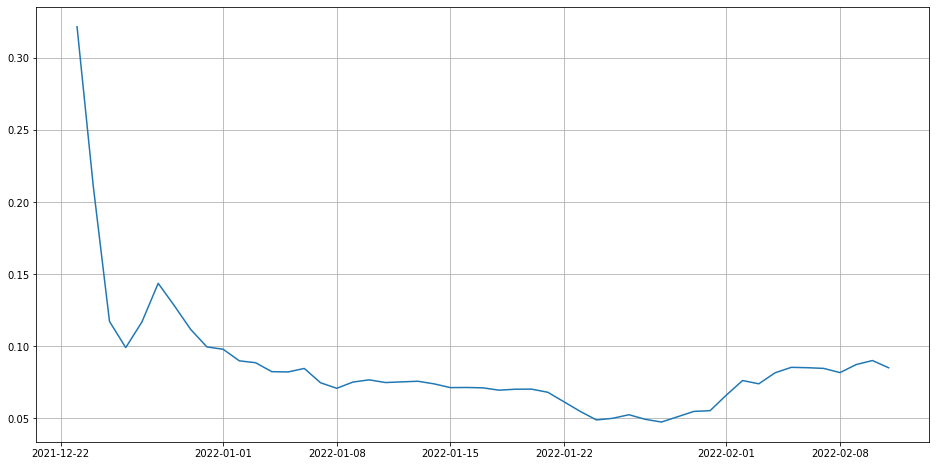

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Mean'])
plt.grid(True)

**예측을 위해 데이터 형식 변경**
* Prophet의 형식이 'ds', 'y'이므로 해당 열로 df_mean 데이터 프레임 만들기
* ds : 날짜 정보
* y : 가격 정보 (현재는 Open, High, Low, Close의 평균값인 Mean)

In [ ]:
df_mean = pd.DataFrame({
    'ds' : df['Date'], 
    'y' : df['Mean']
})
df_mean.head()

,ds,y
0,2022-02-11,0.085088
1,2022-02-10,0.090140
2,2022-02-09,0.087338
3,2022-02-08,0.081752
4,2022-02-07,0.084671


**Facebook Prophet 모델 적용 전 최적의 flexibility 값 탐색**
* 정확도가 가장 높은 flexibility 값을 찾기 위한 탐색
* flexibility 값이 낮으면 과소적합, 높으면 과대적합하여 예측
* 설정하지 않으면 기본 0.05로 예측
* 예측된 그래프가 너무 단순한 것 같다면 값을 높이고, 과하게 예측된 것 같다면 값을 낮춤
* 총 20개의 값(0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3) 중 가장 정확도가 높은(RMSE 값이 가장 작은) 값을 찾는 과정
* RMSE와 MAE 값을 최소로 하는 flexibility 값이 가장 좋겠지만 flexibility 값이 커질수록 RMSE와 MAE 값은 계속 작아지기 때문에 **RMSE와 MAE 값이 급격하게 작아질 때의 flexibility 값을 찾을 예정**


✅ **수정** ✅
* 월, 요일에 따라 규칙성이 나타나는 경우 계절성을 고려
* 1년 정도로 전체 개수가 적은 데이터의 경우 yearly 계절성 고려하지 않는 것이 좋음
* 전체 개수가 아주 적은 데이터의 경우 yearly와 weekly 계절성 모두 고려하지 않는 것이 좋음
* 코드블록 내 model.yearly_seasonality, model.weekly_seasonality 값(파란 글씨)만 수정하면 됨
* 예시 : 계절성을 고려해야하는 모델
* **True/False** 중 원하는 값으로 수정
```
model.yearly_seasonality=True
model.weekly_seasonality=True
```

In [ ]:
df_flex = pd.DataFrame(columns=['flexibility', 'RMSE', 'MAE'])
num = [0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]

for flexibility in num:
  model = Prophet()
  model.changepoint_prior_scale=flexibility
  model.yearly_seasonality=True
  model.weekly_seasonality=True
  model.fit(df_mean)
  future = model.make_future_dataframe(periods=int(len(df)/2))
  forecast = model.predict(future)
  rmse = round(np.sqrt(MSE(df["Mean"], forecast['yhat'][:len(df)])), 5)
  mae = round(MAE(df["Mean"], forecast['yhat'][:len(df)]), 5)
  df_flex = df_flex.append(pd.DataFrame([[flexibility, rmse, mae]], columns=['flexibility', 'RMSE', 'MAE']), ignore_index=True)

df_flex

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

,flexibility,RMSE,MAE
0,0.001,0.05629,0.03869
1,0.003,0.05885,0.04106
2,0.005,0.05786,0.04050
3,0.008,0.05786,0.04050
4,0.010,0.05771,0.04042
5,0.015,0.05778,0.04046
6,0.020,0.05788,0.04051
7,0.025,0.05787,0.04052
8,0.030,0.05787,0.04050
9,0.035,0.05787,0.04050


**최적의 flexibility 값 탐색 - 기울기 값 확인하기**
* 앞서 구한 flexibility 값 별 RMSE와 MAE 값을 토대로 가장 급격하게 변하는 flexibility 값을 표로 확인
* RMSE와 MAE 값이 급격하게 작아질 때의 flexibility 값을 찾을 예정이기 때문에 기울기의 최소값을 갖는 경우를 확인

In [ ]:
df1 = pd.DataFrame(num, columns=['flexibility'])

df2 = pd.DataFrame([0, (df_flex.iat[0, 1]-df_flex.iat[1, 1])/(df_flex.iat[0, 0]-df_flex.iat[1, 0]), (df_flex.iat[1, 1]-df_flex.iat[2, 1])/(df_flex.iat[1, 0]-df_flex.iat[2, 0]), 
                    (df_flex.iat[2, 1]-df_flex.iat[3, 1])/(df_flex.iat[2, 0]-df_flex.iat[3, 0]), (df_flex.iat[3, 1]-df_flex.iat[4, 1])/(df_flex.iat[3, 0]-df_flex.iat[4, 0]), 
                    (df_flex.iat[4, 1]-df_flex.iat[5, 1])/(df_flex.iat[4, 0]-df_flex.iat[5, 0]), (df_flex.iat[5, 1]-df_flex.iat[6, 1])/(df_flex.iat[5, 0]-df_flex.iat[6, 0]), 
                    (df_flex.iat[6, 1]-df_flex.iat[7, 1])/(df_flex.iat[6, 0]-df_flex.iat[7, 0]), (df_flex.iat[7, 1]-df_flex.iat[8, 1])/(df_flex.iat[7, 0]-df_flex.iat[8, 0]), 
                    (df_flex.iat[8, 1]-df_flex.iat[9, 1])/(df_flex.iat[8, 0]-df_flex.iat[9, 0]), (df_flex.iat[9, 1]-df_flex.iat[10, 1])/(df_flex.iat[9, 0]-df_flex.iat[10, 0]), 
                    (df_flex.iat[10, 1]-df_flex.iat[11, 1])/(df_flex.iat[10, 0]-df_flex.iat[11, 0]), (df_flex.iat[11, 1]-df_flex.iat[12, 1])/(df_flex.iat[11, 0]-df_flex.iat[12, 0]), 
                    (df_flex.iat[12, 1]-df_flex.iat[13, 1])/(df_flex.iat[12, 0]-df_flex.iat[13, 0]), (df_flex.iat[13, 1]-df_flex.iat[14, 1])/(df_flex.iat[13, 0]-df_flex.iat[14, 0]), 
                    (df_flex.iat[14, 1]-df_flex.iat[15, 1])/(df_flex.iat[14, 0]-df_flex.iat[15, 0]), (df_flex.iat[15, 1]-df_flex.iat[16, 1])/(df_flex.iat[15, 0]-df_flex.iat[16, 0]), 
                    (df_flex.iat[16, 1]-df_flex.iat[17, 1])/(df_flex.iat[16, 0]-df_flex.iat[17, 0]), (df_flex.iat[17, 1]-df_flex.iat[18, 1])/(df_flex.iat[17, 0]-df_flex.iat[18, 0]), 
                    (df_flex.iat[18, 1]-df_flex.iat[19, 1])/(df_flex.iat[18, 0]-df_flex.iat[19, 0])], columns=['RMSE_slope'])

df3 = pd.DataFrame([0, (df_flex.iat[0, 2]-df_flex.iat[1, 2])/(df_flex.iat[0, 0]-df_flex.iat[1, 0]), (df_flex.iat[1, 2]-df_flex.iat[2, 2])/(df_flex.iat[1, 0]-df_flex.iat[2, 0]), 
                    (df_flex.iat[2, 2]-df_flex.iat[3, 2])/(df_flex.iat[2, 0]-df_flex.iat[3, 0]), (df_flex.iat[3, 2]-df_flex.iat[4, 2])/(df_flex.iat[3, 0]-df_flex.iat[4, 0]), 
                    (df_flex.iat[4, 2]-df_flex.iat[5, 2])/(df_flex.iat[4, 0]-df_flex.iat[5, 0]), (df_flex.iat[5, 2]-df_flex.iat[6, 2])/(df_flex.iat[5, 0]-df_flex.iat[6, 0]), 
                    (df_flex.iat[6, 2]-df_flex.iat[7, 2])/(df_flex.iat[6, 0]-df_flex.iat[7, 0]), (df_flex.iat[7, 2]-df_flex.iat[8, 2])/(df_flex.iat[7, 0]-df_flex.iat[8, 0]), 
                    (df_flex.iat[8, 2]-df_flex.iat[9, 2])/(df_flex.iat[8, 0]-df_flex.iat[9, 0]), (df_flex.iat[9, 2]-df_flex.iat[10, 2])/(df_flex.iat[9, 0]-df_flex.iat[10, 0]), 
                    (df_flex.iat[10, 2]-df_flex.iat[11, 2])/(df_flex.iat[10, 0]-df_flex.iat[11, 0]), (df_flex.iat[11, 2]-df_flex.iat[12, 2])/(df_flex.iat[11, 0]-df_flex.iat[12, 0]), 
                    (df_flex.iat[12, 2]-df_flex.iat[13, 2])/(df_flex.iat[12, 0]-df_flex.iat[13, 0]), (df_flex.iat[13, 2]-df_flex.iat[14, 2])/(df_flex.iat[13, 0]-df_flex.iat[14, 0]), 
                    (df_flex.iat[14, 2]-df_flex.iat[15, 2])/(df_flex.iat[14, 0]-df_flex.iat[15, 0]), (df_flex.iat[15, 2]-df_flex.iat[16, 2])/(df_flex.iat[15, 0]-df_flex.iat[16, 0]), 
                    (df_flex.iat[16, 2]-df_flex.iat[17, 2])/(df_flex.iat[16, 0]-df_flex.iat[17, 0]), (df_flex.iat[17, 2]-df_flex.iat[18, 2])/(df_flex.iat[17, 0]-df_flex.iat[18, 0]), 
                    (df_flex.iat[18, 2]-df_flex.iat[19, 2])/(df_flex.iat[18, 0]-df_flex.iat[19, 0])], columns=['MAE_slope'])

slope = pd.concat([df1, df2, df3], axis=1)
slope

,flexibility,RMSE_slope,MAE_slope
0,0.001,0.000,0.0000
1,0.003,1.280,1.1850
2,0.005,-0.495,-0.2800
3,0.008,-0.000,-0.0000
4,0.010,-0.075,-0.0400
5,0.015,0.014,0.0080
6,0.020,0.020,0.0100
7,0.025,-0.002,0.0020
8,0.030,-0.000,-0.0040
9,0.035,-0.000,-0.0000


**최적의 flexibility 값 탐색 - 그래프로 확인하기**
* 왼쪽은 x축은 flexibility 값, y축은 RMSE와 MAE 값으로 그려진 그래프
* 오른쪽은 x축은 flexibility 값, y축은 RMSE와 MAE 값 사이의 기울기 값으로 그려진 그래프

📌 **분석** 📌
* **왼쪽 그래프에서 급격하게 작은 값이 되는 값이 눈으로 보이지 않기 때문에 최소 기울기를 갖는 경우를 확인해보면 flexibility가 0.003인 경우에 기울기가 가장 급격하게 변함**
* **오른쪽 그래프에서 0.003인 경우에 최소 기울기를 갖는 것을 볼 수 있음**
* **따라서 flexibility는 0.003으로 하는 것이 적당함**

💥결과 중 그래프 바로 위에 나타나는 flexibility, RMSE_slope, MAE_slope 값이 2개 이상이거나 flexibility 값이 여러개인 경우는 뒤 분석 진행하지 말고 종목 코드 따로 알려주세요!

   flexibility  RMSE_slope  MAE_slope
2        0.005      -0.495      -0.28    flexibility  RMSE_slope  MAE_slope
2        0.005      -0.495      -0.28


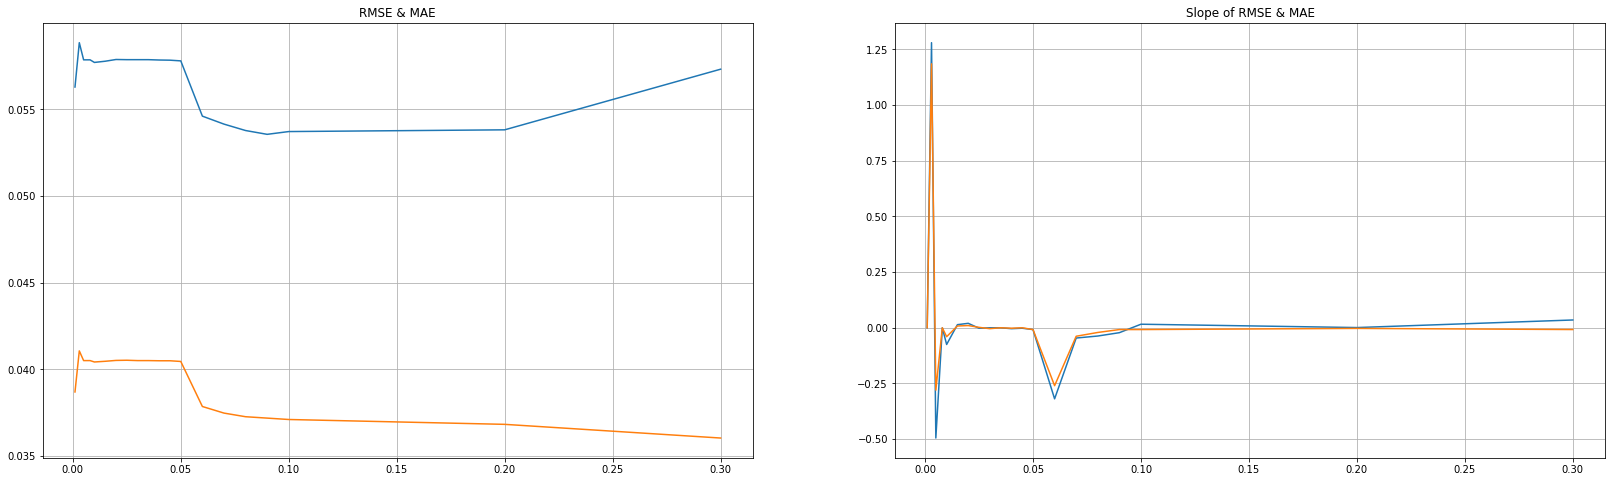

In [ ]:
min_rmse = min(slope['RMSE_slope'])
min_mae = min(slope['MAE_slope'])
print(slope[slope.RMSE_slope == min_rmse], slope[slope.MAE_slope == min_mae])

plt.figure(figsize=(28, 8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(df_flex['flexibility'], df_flex['RMSE'], label='RMSE')
ax1.plot(df_flex['flexibility'], df_flex['MAE'], label='MAE')
ax2.plot(slope['flexibility'], slope['RMSE_slope'], label='RMSE')
ax2.plot(slope['flexibility'], slope['MAE_slope'], label='MAE')
ax1.set_title('RMSE & MAE')
ax2.set_title('Slope of RMSE & MAE')
ax1.grid(True)
ax2.grid(True)

**예측을 위해 Facebook Prophet 모델 적용**
* 페이스북이 만든 시계열 예측 라이브러리 Prophet에 데이터를 넣어 모델 적용
* flexibility, 연간 계절성, 주간 계절성을 고려하여 모델 적용

✅ **수정** ✅
* 월, 요일에 따라 규칙성이 나타나는 경우 계절성을 고려
* 1년 정도로 전체 개수가 적은 데이터의 경우 계절성 고려하지 않는 것이 좋음
* 코드블록 내 model.yearly_seasonality, model.weekly_seasonality 값(파란 글씨)만 수정하면 됨
* 예시 : 계절성을 고려해야하는 모델
* **True/False** 중 원하는 값으로 수정
```
model.yearly_seasonality=True
model.weekly_seasonality=True
```

In [ ]:
model = Prophet()
flexibility = slope[slope.RMSE_slope == min_rmse].iat[0, 0]
model.changepoint_prior_scale=flexibility
model.yearly_seasonality=True
model.weekly_seasonality=True
model.fit(df_mean)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**적용한 모델을 기반으로 예측한 데이터 생성**
* 원하는 예측 데이터의 개수 설정 필요
* 전체 데이터의 절반 정도 개수만큼 예측에 사용


* ds : 날짜 정보
* yhat : 예측된 가격 정보
* yhat_lower : 예측된 가격의 하한값
* yhat_upper : 예측된 가격의 상한값

In [ ]:
future = model.make_future_dataframe(periods=int(len(df)/2))
forecast = model.predict(future)

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2021-12-23,0.147419,0.101536,0.192469
1,2021-12-24,0.130417,0.084299,0.175817
2,2021-12-25,0.111667,0.065924,0.157145
3,2021-12-26,0.108093,0.060603,0.149447
4,2021-12-27,0.109805,0.066046,0.151314
...,...,...,...,...
71,2022-03-04,0.022692,-0.019944,0.068801
72,2022-03-05,0.003942,-0.037762,0.049241
73,2022-03-06,0.000367,-0.045005,0.044163
74,2022-03-07,0.002079,-0.044213,0.049687


**예측 정확도 평가를 위한 값**
* MSE, RMSE, MAE 값을 이용해 모델의 정확도 평가 가능
* 원래 기능은 같은 데이터에 여러 가지의 모델을 적용했을 때 어떤 모형이 가장 예측을 잘 하는지 평가하기 위해 사용
* 다른 데이터에 대해 같은 모델을 적용했을 때(우리의 경우)는 대략적으로 참고만 하면 좋을 것 같음


* MSE, RMSE, MAE 값이 낮을수록 예측을 잘 했다고 평가
* RMSE는 MSE 값에 루트 씌운 값으로 MSE 값이 너무 커서 그냥 하나 넣어봄

In [ ]:
# MSE, MAE는 낮을 수록 상대적으로 더 좋은 모델
mse = str(round(MSE(df["Mean"], forecast['yhat'][:len(df)]), 5))
rmse = str(round(np.sqrt(MSE(df["Mean"], forecast['yhat'][:len(df)])), 5))
mae = str(round(MAE(df["Mean"], forecast['yhat'][:len(df)]), 5))

print("MSE : ", mse)
print("RMSE : ", rmse)
print("MAE : ", mae)

MSE :  0.00335
RMSE :  0.05786
MAE :  0.0405


**예측값과 실제값을 비교하는 그래프**
* 예측값은 주황 실선으로, 실제값은 파란 실선으로 그려진 그래프

📌 **분석** 📌
* **2021년 3월까지는 실제값과 매우 유사함**
* **2021년 3월 이후 값의 차이가 심하게 나는데 이는 가격 외의 요인이 작용했다고 보여짐**

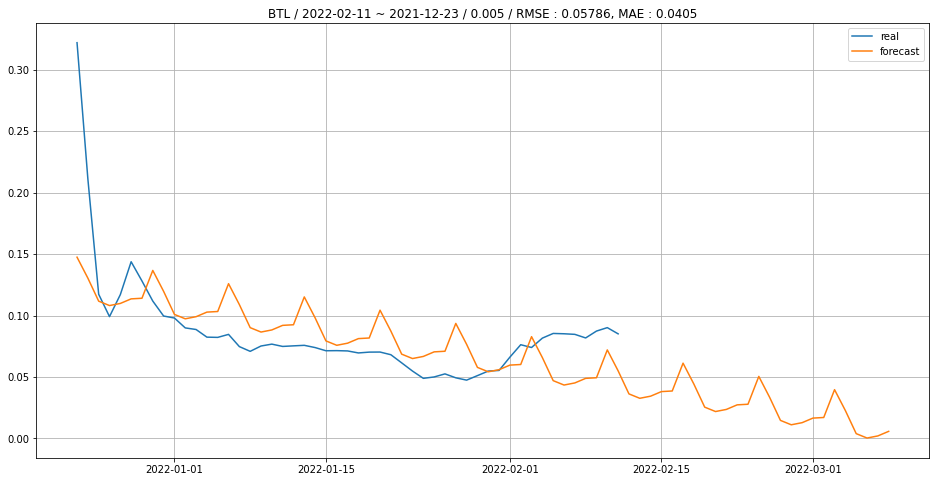

In [ ]:
flex = str(flexibility)
start = str(df["Date"][0])[0:10]
end = str(df["Date"][len(df)-1])[0:10]

plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Mean'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.title(symbol+' / '+start+' ~ '+end+' / '+flex+' / RMSE : '+rmse+', MAE : '+mae)
plt.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

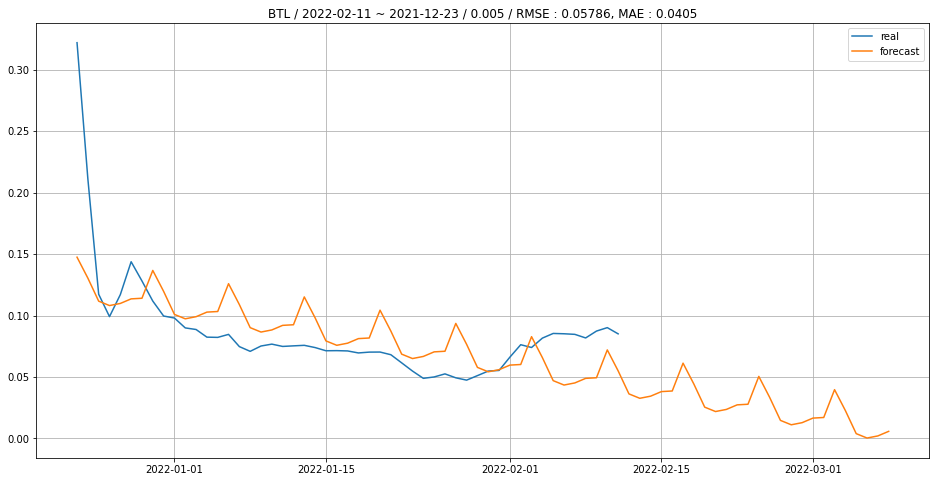

In [ ]:
flex = str(flexibility)
start = str(df["Date"][0])[0:10]
end = str(df["Date"][len(df)-1])[0:10]

plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Mean'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'forecast')
plt.title(symbol+' / '+start+' ~ '+end+' / '+flex+' / RMSE : '+rmse+', MAE : '+mae)
plt.grid(True)
plt.legend()
plt.savefig(symbol+'_'+start+'_'+end+'_'+flex+'.png')
files.download(symbol+'_'+start+'_'+end+'_'+flex+'.png')
plt.show()